In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt
from numpy import sqrt, cosh, cos, sinh
import yaml

from explainer.ExhaustiveSearch import GraphExplainer
from explainer import graph_visz

sns.set(style="darkgrid")

In [2]:
import os
os.chdir('./src')

In [3]:
def dR(eta_1, phi_1, eta_2, phi_2):
    d_eta = eta_1 - eta_2
    
    d_phi = phi_1 - phi_2
    while d_phi >= np.pi:
        d_phi -= 2 * np.pi
    while d_phi < -np.pi:
        d_phi += 2 * np.pi
    return np.sqrt(d_eta**2 + d_phi**2)

In [4]:
pos200 = pd.read_pickle(Path('../data/raw') / 'TT_DsTau3muPU200_MTD.pkl')
pos0 = pd.read_pickle(Path('../data/raw') / 'TT_DsTau3muPU0_Private.pkl')

In [5]:
pos200 = pos200[pos200['n_gen_tau'] == 1].reset_index(drop=True)
pos200 = pos200[pos200['n_L1_TkMuStub'] != 0].reset_index(drop=True)


pos0 = pos0[pos0['n_gen_tau'] == 1].reset_index(drop=True)
pos0 = pos0[pos0['n_L1_TkMuStub'] != 0].reset_index(drop=True)

In [6]:

all_hit_dR_res = []
all_gen_dR = []
for idx in tqdm(range(len(pos0))):

    tk_n = pos0.iloc[idx]['n_L1_TkMuStub']
    tk_eta = pos0.iloc[idx]['L1_TkMuStub_eta']
    tk_phi = pos0.iloc[idx]['L1_TkMuStub_phi']

    gen_eta = pos0.iloc[idx]['gen_mu_eta']
    gen_phi = pos0.iloc[idx]['gen_mu_phi']

    res = []
    for tk_idx in range(tk_n):
        for gen_mu_idx in range(3):
            res.append([tk_idx, dR(tk_eta[tk_idx], tk_phi[tk_idx], gen_eta[gen_mu_idx], gen_phi[gen_mu_idx])])
    res = np.array(res)
    
    min_tk_idx = int(res[np.argmin(res[:, 1])][0])
    min_dR = np.min(res[:, 1])
    all_gen_dR.append(min_dR)
    if min_dR > 0.02:
        continue
    
    hit_phi = np.deg2rad(pos0.iloc[idx]['mu_hit_sim_phi'])[pos0.iloc[idx]['mu_hit_station'] == 1]
    hit_eta = pos0.iloc[idx]['mu_hit_sim_eta'][pos0.iloc[idx]['mu_hit_station'] == 1]
    
    hit_dR_res = []
    for hit_idx in range(len(hit_phi)):
        hit_dR_res.append(dR(tk_eta[min_tk_idx], tk_phi[min_tk_idx], hit_eta[hit_idx], hit_phi[hit_idx]))
    all_hit_dR_res.append([idx, min_tk_idx, min_dR, np.array(hit_dR_res)])
all_hit_dR_res = np.array(all_hit_dR_res, dtype=object)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21500/21500 [00:20<00:00, 1051.29it/s]


Text(0.5, 0, 'dR')

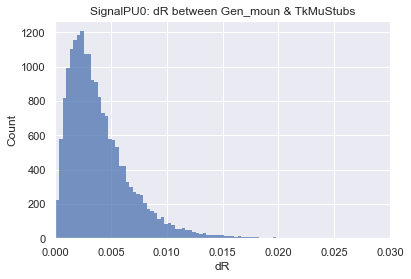

In [12]:
sns.histplot(all_gen_dR)
plt.xlim(0, 0.03)
plt.title('SignalPU0: dR between Gen_moun & TkMuStubs')
plt.xlabel('dR')

Text(0.5, 0, 'dR')

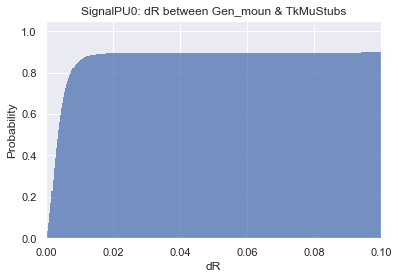

In [14]:
sns.histplot(all_gen_dR, cumulative=True, stat='probability')
plt.xlim(0, 0.1)
plt.title('SignalPU0: dR between Gen_moun & TkMuStubs')
plt.xlabel('dR')

In [15]:
all_dp = [each_dR for hit_dR in all_hit_dR_res[:, -1] for each_dR in hit_dR ]

Text(0.5, 0, 'dR')

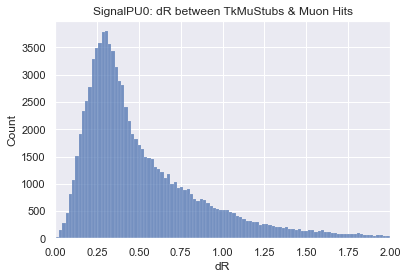

In [16]:
sns.histplot(all_dp)
plt.xlim(0, 2)
plt.title('SignalPU0: dR between TkMuStubs & Muon Hits')
plt.xlabel('dR')

Text(0.5, 0, 'dR')

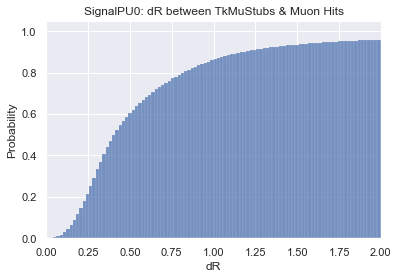

In [17]:
sns.histplot(all_dp, cumulative=True, stat='probability')
plt.xlim(0, 2)
plt.title('SignalPU0: dR between TkMuStubs & Muon Hits')
plt.xlabel('dR')

In [212]:

all_hit_dR_res = []
all_gen_dR = []
for idx in tqdm(range(len(pos200))):

    tk_n = pos200.iloc[idx]['n_L1_TkMuStub']
    tk_eta = pos200.iloc[idx]['L1_TkMuStub_eta']
    tk_phi = pos200.iloc[idx]['L1_TkMuStub_phi']

    gen_eta = pos200.iloc[idx]['gen_mu_eta']
    gen_phi = pos200.iloc[idx]['gen_mu_phi']

    res = []
    for tk_idx in range(tk_n):
        for gen_mu_idx in range(3):
            res.append([tk_idx, dR(tk_eta[tk_idx], tk_phi[tk_idx], gen_eta[gen_mu_idx], gen_phi[gen_mu_idx])])
    res = np.array(res)
    
    min_tk_idx = int(res[np.argmin(res[:, 1])][0])
    min_dR = np.min(res[:, 1])
    all_gen_dR.append(min_dR)
    if min_dR > 0.02:
        continue
    
    hit_phi = np.deg2rad(pos200.iloc[idx]['mu_hit_sim_phi'])[pos200.iloc[idx]['mu_hit_station'] == 1]
    hit_eta = pos200.iloc[idx]['mu_hit_sim_eta'][pos200.iloc[idx]['mu_hit_station'] == 1]
    
    hit_dR_res = []
    for hit_idx in range(len(hit_phi)):        
        hit_dR_res.append(dR(tk_eta[min_tk_idx], tk_phi[min_tk_idx], hit_eta[hit_idx], hit_phi[hit_idx]))
    
    all_hit_dR_res.append([idx, min_tk_idx, min_dR, np.array(hit_dR_res)])
all_hit_dR_res = np.array(all_hit_dR_res, dtype=object)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76155/76155 [00:58<00:00, 1306.53it/s]


(0.0, 0.03)

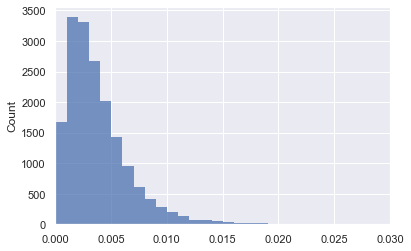

In [223]:
sns.histplot(all_gen_dR, binwidth=0.001)
plt.xlim(0, 0.03)

(0.0, 1.0)

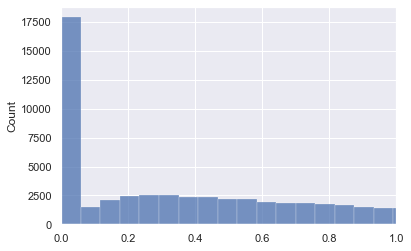

In [229]:
sns.histplot(all_gen_dR)
plt.xlim(0, 1)

(0.0, 8.0)

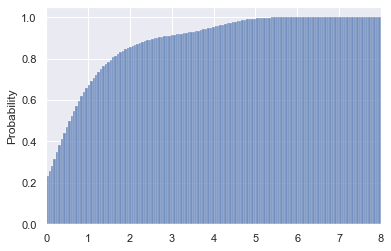

In [227]:
sns.histplot(all_gen_dR, cumulative=True, stat='probability')
plt.xlim(0, 8)

In [230]:
all_dp = [each_dR for hit_dR in all_hit_dR_res[:, -1] for each_dR in hit_dR ]

(0.0, 2.0)

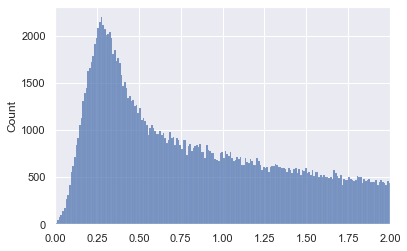

In [241]:
sns.histplot(all_dp, binwidth=0.01)
plt.xlim(0, 2)

(0.0, 6.0)

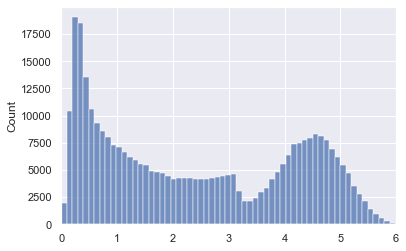

In [242]:
sns.histplot(all_dp)
plt.xlim(0, 6)

(0.0, 6.0)

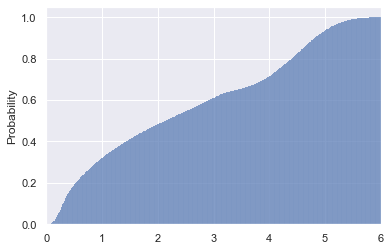

In [244]:
sns.histplot(all_dp, binwidth=0.01, cumulative=True, stat='probability')
plt.xlim(0, 6)

In [8]:
pos200['y'] = 1

all_hit_dR_res = []
all_gen_dR = []
data_list = []
for idx, entry in enumerate(tqdm(pos200.itertuples(), total=len(pos200))):
    data_list.append(m.dataset.process_one_entry(pos200, entry))

    tk_n = pos200.iloc[idx]['n_L1_TkMuStub']
    tk_eta = pos200.iloc[idx]['L1_TkMuStub_eta']
    tk_phi = pos200.iloc[idx]['L1_TkMuStub_phi']

    gen_eta = pos200.iloc[idx]['gen_mu_eta']
    gen_phi = pos200.iloc[idx]['gen_mu_phi']

    res = []
    for tk_idx in range(tk_n):
        for gen_mu_idx in range(3):
            res.append([tk_idx, dR(tk_eta[tk_idx], tk_phi[tk_idx], gen_eta[gen_mu_idx], gen_phi[gen_mu_idx])])
    res = np.array(res)
    
    min_tk_idx = int(res[np.argmin(res[:, 1])][0])
    min_dR = np.min(res[:, 1])
    all_gen_dR.append(min_dR)
    if min_dR > 0.02:
        continue
    
    hit_phi = np.deg2rad(pos200.iloc[idx]['mu_hit_sim_phi'])[pos200.iloc[idx]['mu_hit_station'] == 1]
    hit_eta = pos200.iloc[idx]['mu_hit_sim_eta'][pos200.iloc[idx]['mu_hit_station'] == 1]
    hit_num = (pos200.iloc[idx]['mu_hit_station'] == 1).sum()
    
    hit_dR_res = []
    hit_idx_res = []
    for hit_idx in range(len(hit_phi)):      
        ddddR = dR(tk_eta[min_tk_idx], tk_phi[min_tk_idx], hit_eta[hit_idx], hit_phi[hit_idx])
        if ddddR < 0.75:
            hit_dR_res.append(ddddR)
            hit_idx_res.append(hit_idx)
    all_hit_dR_res.append([idx, tk_eta[min_tk_idx], tk_phi[min_tk_idx], min_dR, hit_num, 
                           np.array(hit_idx_res), np.array(hit_dR_res)])
    
all_hit_dR_res = np.array(all_hit_dR_res, dtype=object)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76155/76155 [02:02<00:00, 621.37it/s]


In [27]:
num = [each.shape[0] for each in all_hit_dR_res[:, -1]]

(0.0, 15.0)

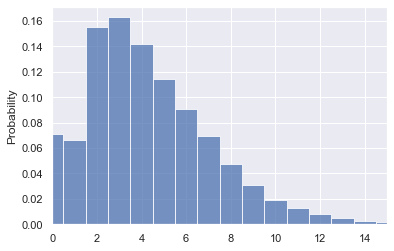

In [28]:
sns.histplot(num, discrete=True, binwidth=1, stat='probability')
plt.xlim(0, 15)

(0.0, 15.0)

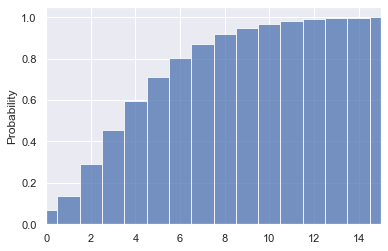

In [29]:
sns.histplot(num, discrete=True, binwidth=1, stat='probability', cumulative=True)
plt.xlim(0, 15)

In [6]:
from main import Main
from torch_geometric.data import DataLoader
import torch

In [7]:
cfg = Path('./configs') / 'config0_radius.yml'


cfg_dict = yaml.safe_load(cfg.open('r'))
m = Main(cfg_dict, '_'.join(cfg.stem.split('_')[1:]))
m.load_checkpoint()

[INFO] run_type: reg
[Splits]
    train: 395255
    valid: 84694
    test: 97534
[INFO] Training accuracy lower bound:  0.862
[INFO] Data md5: 6ddc8c61d0e7287baae4df3be15e4d50
[INFO] Number of trainable parameters: 1201537
[INFO] Loading checkpoint from DeepGAT-07_24_2021-14_30_54-radius


In [9]:
all_xypos = graph_visz.get_xypos(pos200)
labels = ['mu_hit_sim_phi', 'mu_hit_sim_eta']

m.batch_size = 5000
explainer = GraphExplainer(m.model, m.batch_size, m.device)

In [10]:
data_loader = DataLoader(data_list, batch_size=1, shuffle=False)
pbar = tqdm(data_loader)

  0%|                                                                                                                                                    | 0/76155 [00:00<?, ?it/s]

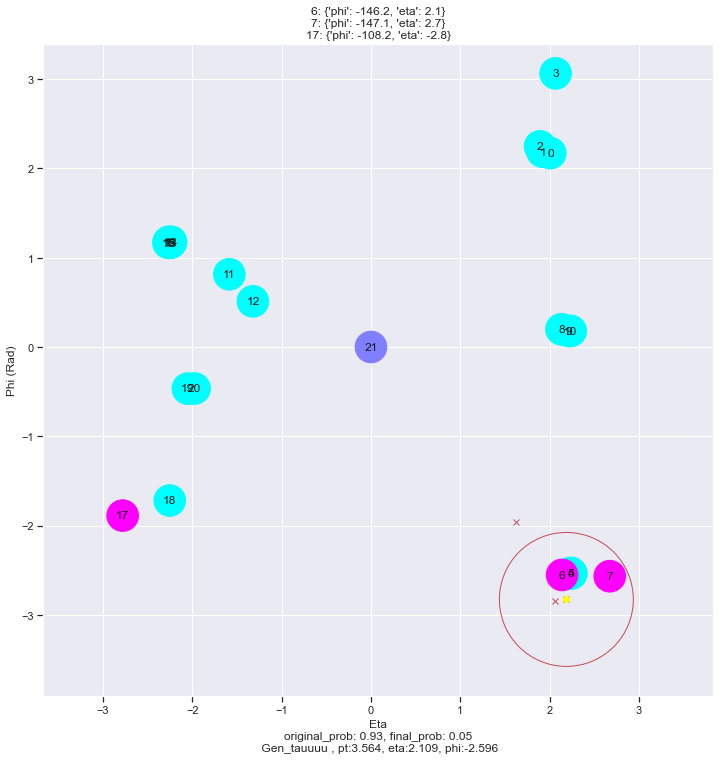

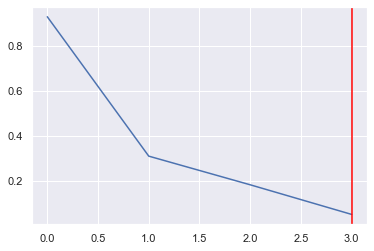

  0%|                                                                                                                                         | 3/76155 [00:02<17:51:47,  1.18it/s]

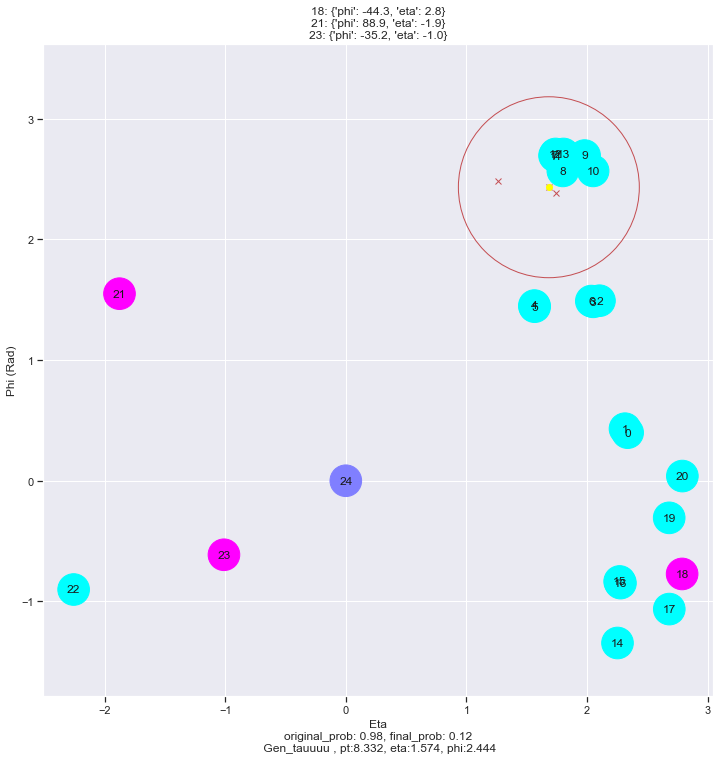

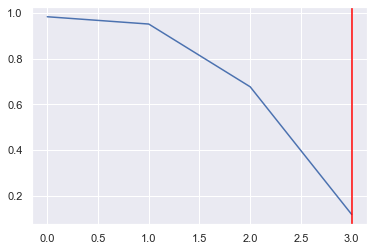

  0%|                                                                                                                                         | 6/76155 [00:04<16:32:36,  1.28it/s]

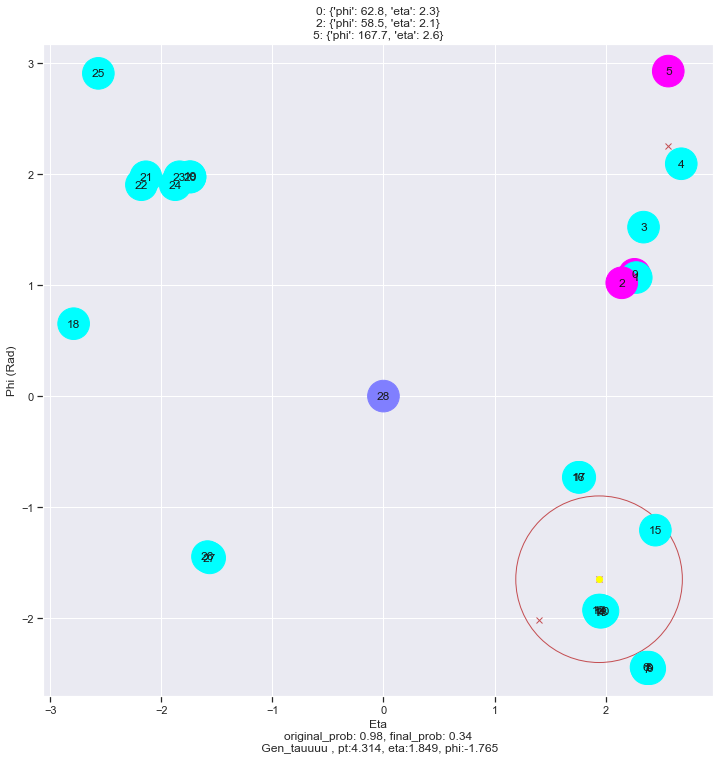

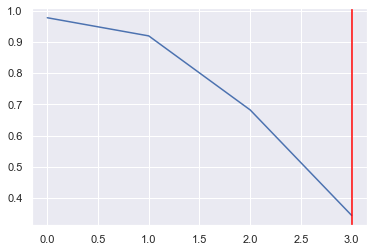

  0%|                                                                                                                                         | 8/76155 [00:06<19:29:16,  1.09it/s]

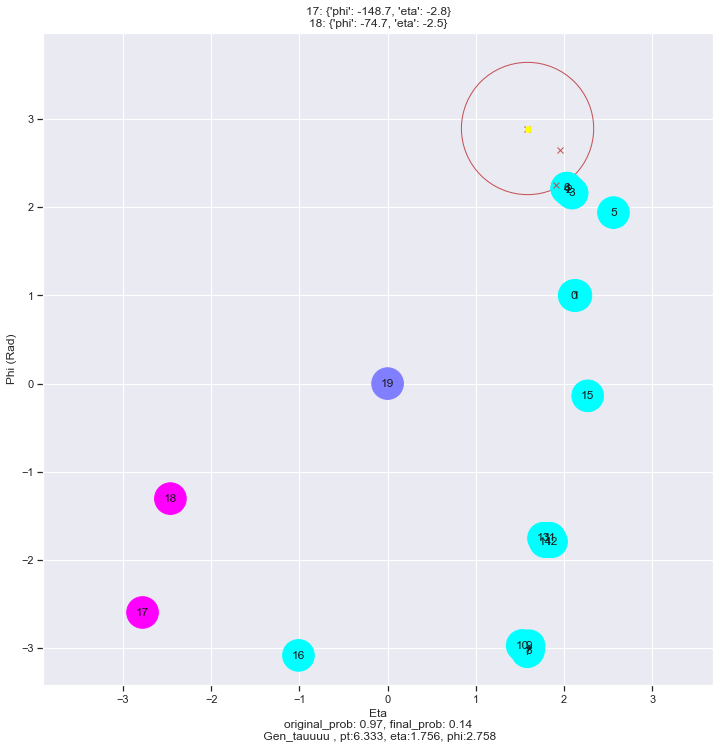

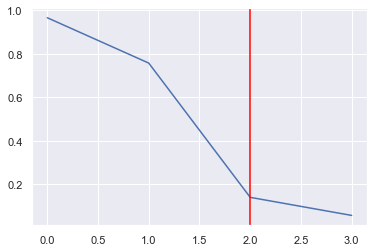

  0%|                                                                                                                                        | 11/76155 [00:08<16:24:15,  1.29it/s]

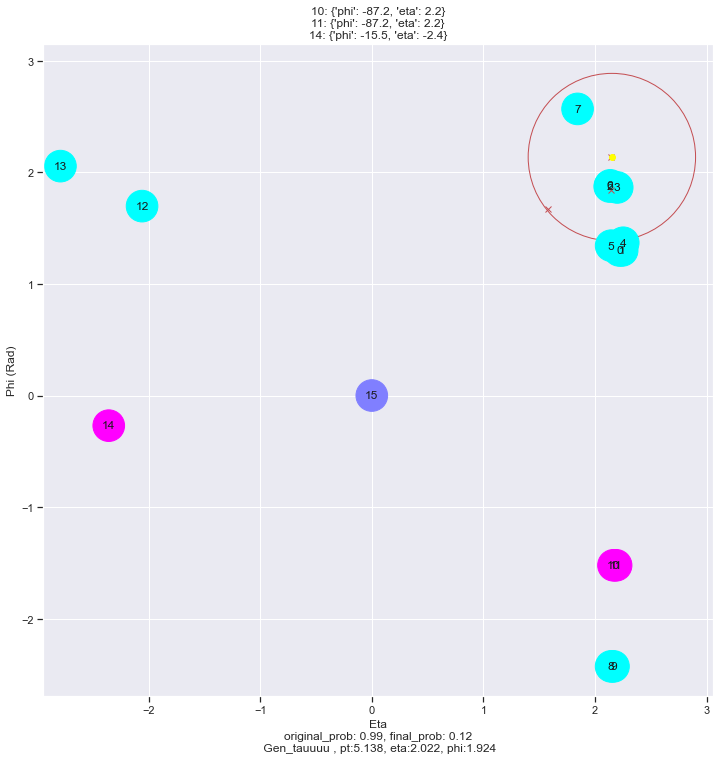

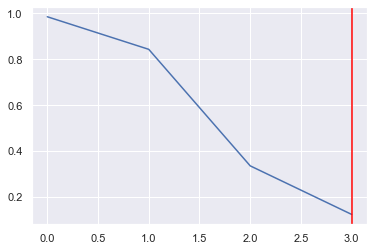

  0%|                                                                                                                                        | 13/76155 [00:09<14:05:48,  1.50it/s]

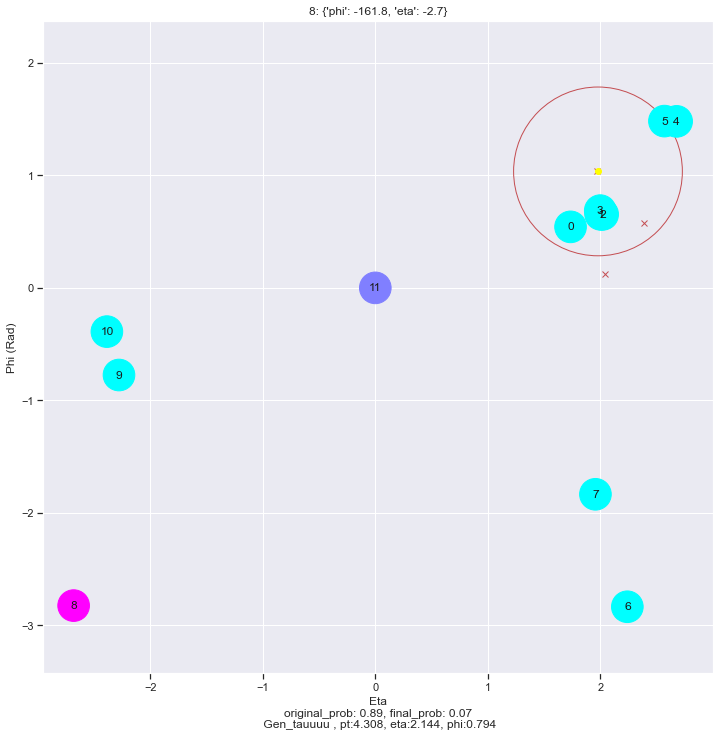

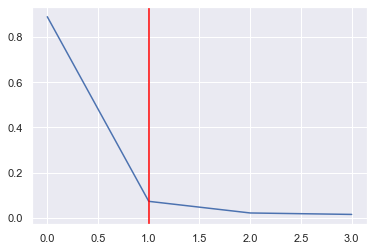

  0%|                                                                                                                                        | 17/76155 [00:09<11:14:39,  1.88it/s]

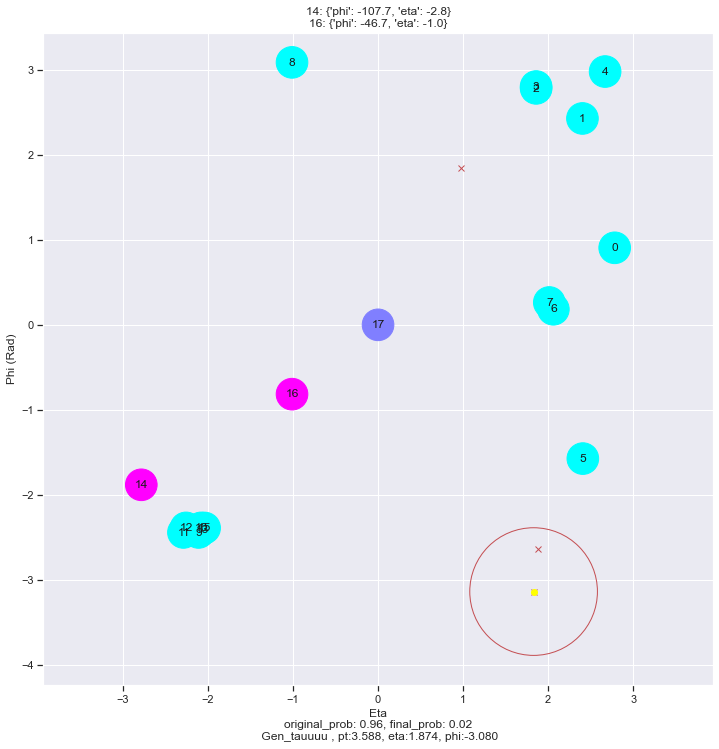

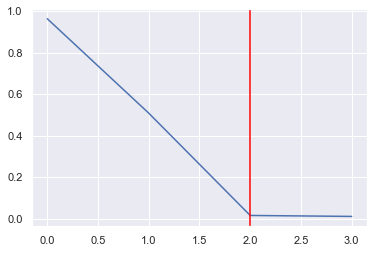

  0%|                                                                                                                                         | 21/76155 [00:11<9:44:51,  2.17it/s]

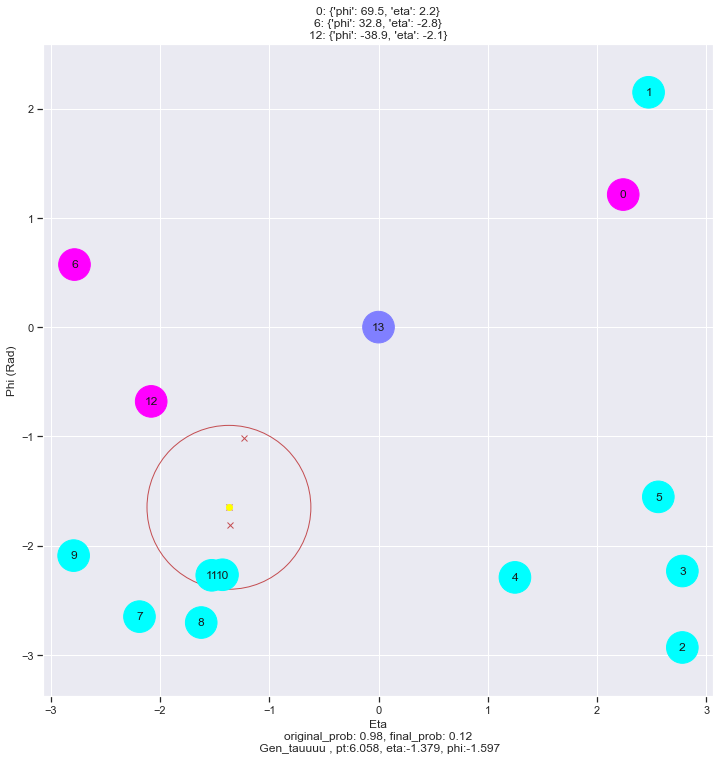

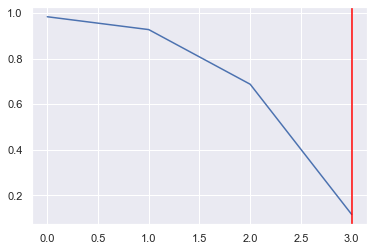

  0%|                                                                                                                                         | 36/76155 [00:12<7:13:25,  2.93it/s]

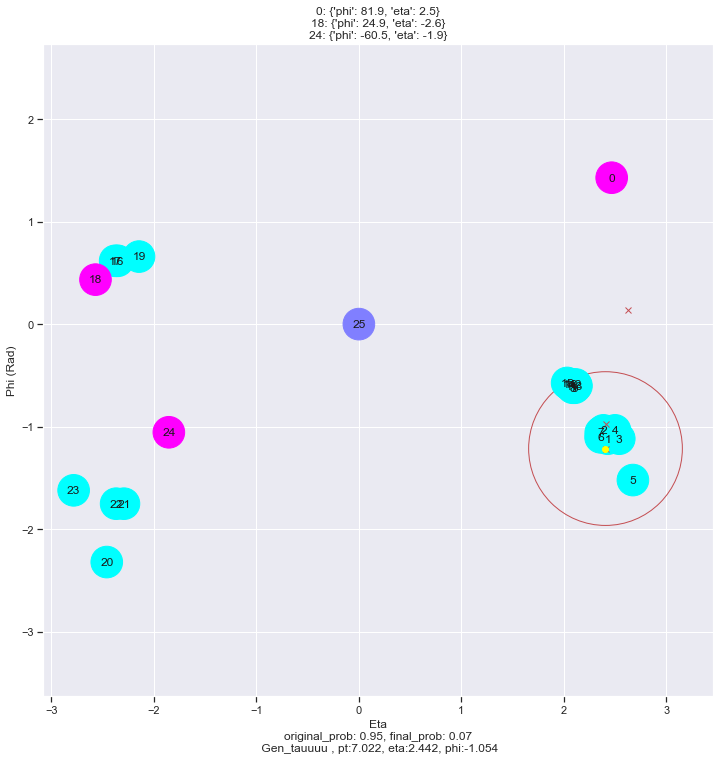

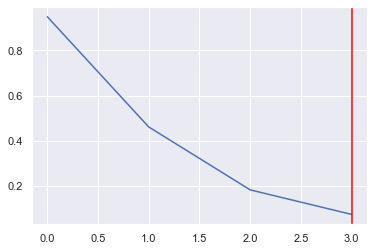

  0%|                                                                                                                                        | 37/76155 [00:14<18:08:00,  1.17it/s]

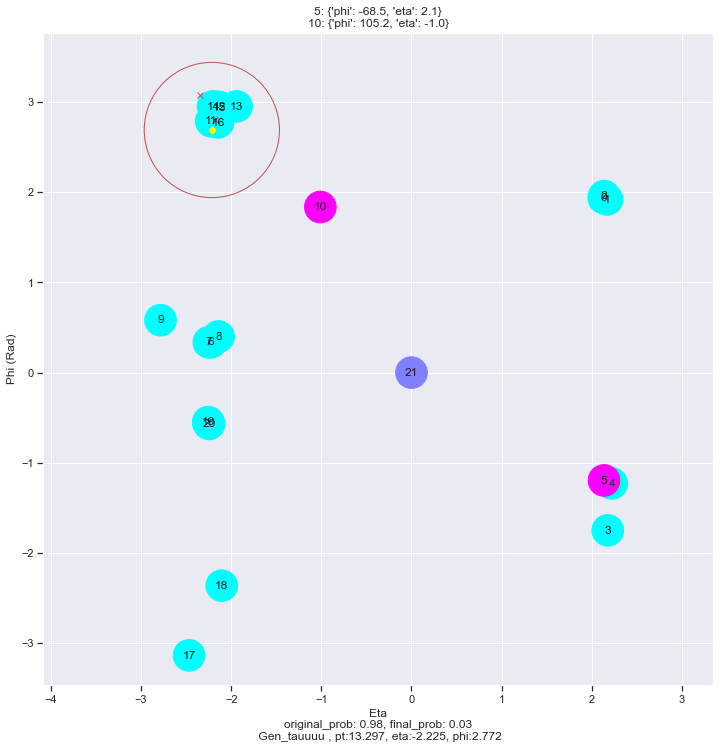

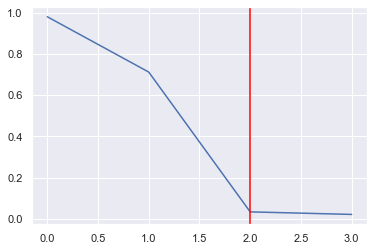

  0%|                                                                                                                                         | 43/76155 [00:18<9:16:42,  2.28it/s]


AssertionError: 

In [11]:
show_instance = True
for idx, data in enumerate(pbar):
    if idx in all_hit_dR_res[:, 0]:

        dR_idx = np.argwhere(all_hit_dR_res[:, 0] == idx).item()

        xypos = all_xypos[idx]
        entry = pos200.loc[idx]
        circle = {'eta': all_hit_dR_res[dR_idx, 1], 'phi': all_hit_dR_res[dR_idx, 2], 'r': 0.75}
        node_mask, original_prob, final_prob, n_selected = explainer.explain_graph(data, show_instance, 
                                                                                   xypos, entry, labels, circle)


In [19]:
entry

n_gen_tau                                                           1
n_gen_mu                                                            3
n_mu_hit                                                           21
n_L1TT_trk                                                        127
n_L1_TkMu                                                           1
                                           ...                       
L1_TkMuStub_p                [4.04167, 4.759287, 7.6590614, 9.319309]
L1_TkMuStub_z         [1.522367, -0.2285075, -0.25426298, -1.7521586]
L1_TkMuStub_chi2          [75.37939, 30.402645, 44.459118, 32.028316]
L1_TkMuStub_nstubs                                       [6, 5, 5, 5]
y                                                                   1
Name: 2, Length: 63, dtype: object

In [17]:
pos200.loc[2]

n_gen_tau                                                           1
n_gen_mu                                                            3
n_mu_hit                                                           21
n_L1TT_trk                                                        127
n_L1_TkMu                                                           1
                                           ...                       
L1_TkMuStub_p                [4.04167, 4.759287, 7.6590614, 9.319309]
L1_TkMuStub_z         [1.522367, -0.2285075, -0.25426298, -1.7521586]
L1_TkMuStub_chi2          [75.37939, 30.402645, 44.459118, 32.028316]
L1_TkMuStub_nstubs                                       [6, 5, 5, 5]
y                                                                   1
Name: 2, Length: 63, dtype: object

In [54]:
all_hit_dR_res[0, 1]

2.188084